In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Get the data into a Pandas dataframe
leaf_df = pd.read_csv( "Data/Leaf/leaf.csv" )

# Set the column names - unfortunately they're not included in the data
leaf_df.columns = [
  'Species', 'Specimen.Number', 'Eccentricity', 'Aspect.Ratio',
  'Elongation', 'Solidity', 'Stochastic.Convexity',
  'Isoperimetric.Factor', 'Maximal.Indentation.Depth', 'Lobedness',
  'Average.Intensity', 'Average.Contrast', 'Smoothness',
  'Third.moment', 'Uniformity', 'Entropy'
]

# Look at the results
leaf_df.head()

,Species,Specimen.Number,Eccentricity,Aspect.Ratio,Elongation,Solidity,Stochastic.Convexity,Isoperimetric.Factor,Maximal.Indentation.Depth,Lobedness,Average.Intensity,Average.Contrast,Smoothness,Third.moment,Uniformity,Entropy
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068


In [3]:
# Drop rows with missing data and display the result
leaf_df = leaf_df.dropna()
leaf_df.head(10)

,Species,Specimen.Number,Eccentricity,Aspect.Ratio,Elongation,Solidity,Stochastic.Convexity,Isoperimetric.Factor,Maximal.Indentation.Depth,Lobedness,Average.Intensity,Average.Contrast,Smoothness,Third.moment,Uniformity,Entropy
0,1,2,0.74173,1.5257,0.36116,0.98152,0.99825,0.79867,0.005242,0.005002,0.024160,0.090476,0.008119,0.002708,0.000075,0.69659
1,1,3,0.76722,1.5725,0.38998,0.97755,1.00000,0.80812,0.007457,0.010121,0.011897,0.057445,0.003289,0.000921,0.000038,0.44348
2,1,4,0.73797,1.4597,0.35376,0.97566,1.00000,0.81697,0.006877,0.008607,0.015950,0.065491,0.004271,0.001154,0.000066,0.58785
3,1,5,0.82301,1.7707,0.44462,0.97698,1.00000,0.75493,0.007428,0.010042,0.007938,0.045339,0.002051,0.000560,0.000024,0.34214
4,1,6,0.72997,1.4892,0.34284,0.98755,1.00000,0.84482,0.004945,0.004451,0.010487,0.058528,0.003414,0.001125,0.000025,0.34068
5,1,7,0.82063,1.7529,0.44458,0.97964,0.99649,0.76770,0.005928,0.006395,0.018375,0.080587,0.006452,0.002271,0.000041,0.53904
6,1,8,0.77982,1.6215,0.39222,0.98512,0.99825,0.80816,0.005099,0.004731,0.024875,0.089686,0.007979,0.002466,0.000147,0.66975
7,1,9,0.83089,1.8199,0.45693,0.98240,1.00000,0.77106,0.006006,0.006564,0.007245,0.040616,0.001647,0.000388,0.000033,0.33696
8,1,10,0.90631,2.3906,0.58336,0.97683,0.99825,0.66419,0.008402,0.012848,0.007010,0.042347,0.001790,0.000459,0.000028,0.28082
9,1,11,0.74590,1.4927,0.34116,0.98296,1.00000,0.83088,0.005567,0.005640,0.005768,0.036511,0.001331,0.000309,0.000032,0.25026


## Focus attention on a subset of the data

In [4]:
# Drop some species, leaving groups that are roughly round or oval or highly lobed
roundish = {1, 2, 3, 4, 26, 27}
lobish = {6, 11, 17, 19, 21, 39}
toPlot = leaf_df[leaf_df['Species'].isin(roundish) | leaf_df['Species'].isin(lobish)]

#### Add a column that indicates whether the leaf was roundish or lobish

In [5]:
toPlot = toPlot.assign( Shape=np.where( toPlot['Species'].isin(roundish), 1, 2 ) )
toPlot["Shape"].to_numpy()

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

#### Make pair plots

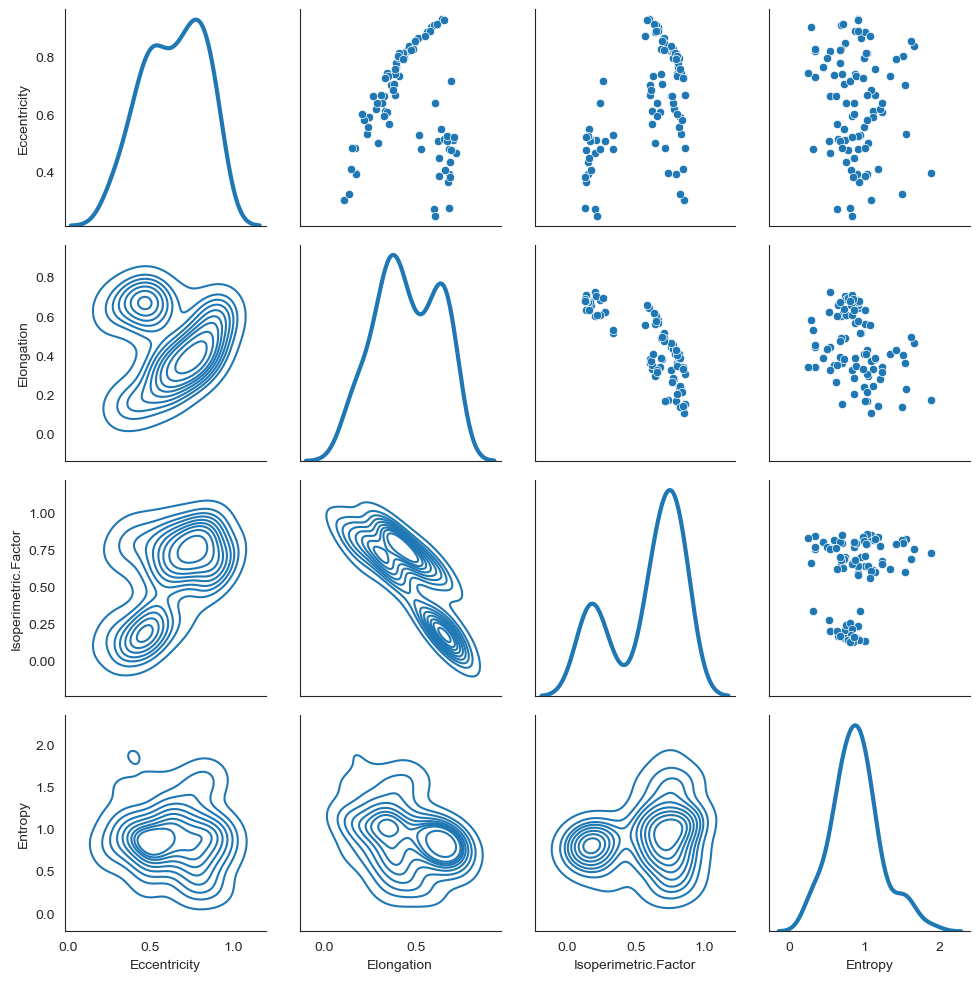

In [6]:
# Do the thing
sns.set_style("white")
g = sns.PairGrid(toPlot, diag_sharey=False, vars=['Eccentricity', 'Elongation', 'Isoperimetric.Factor', 'Entropy'])
g.map_lower(sns.kdeplot )
g.map_upper(sns.scatterplot ) #, style=toPlot["Shape"] )
g.map_diag(sns.kdeplot, lw=3 )

In [7]:
g.savefig( "Figures/BlueLeafGrid.pdf" )

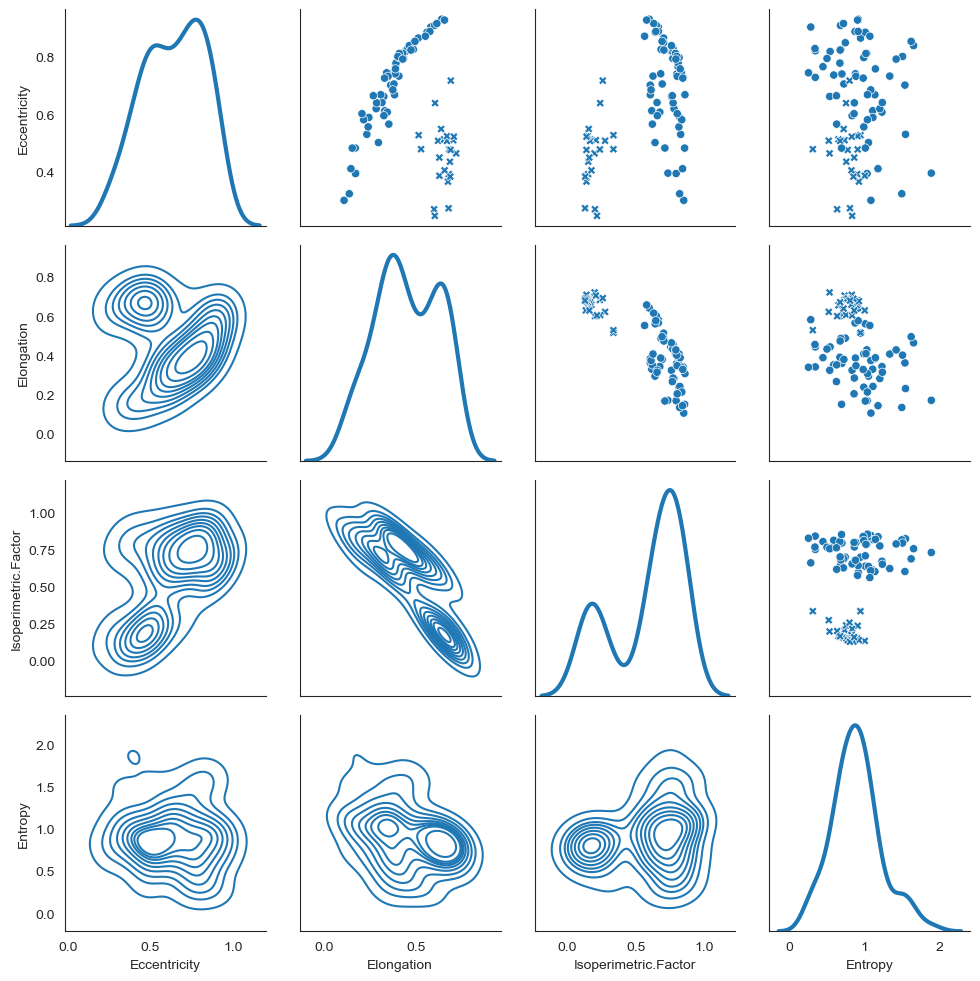

In [8]:
# Again, with shapes to distiguish rounded from heavily lobed leaves.
g = sns.PairGrid(toPlot, diag_sharey=False, vars=['Eccentricity', 'Elongation', 'Isoperimetric.Factor', 'Entropy'])
g.map_lower(sns.kdeplot )
g.map_upper(sns.scatterplot, style=toPlot["Shape"] )
g.map_diag(sns.kdeplot, lw=3 )

g.savefig( "Figures/BlueLeafGridWithShapes.pdf" )